# Data Exploration Assignment Part 1 - NOAA Ann Arbor Data

In [46]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Directly import the Ann Arbor rain data csv from the Google Drive data inventory
url = 'https://drive.google.com/file/d/17aWCaFWyqVfZ5IXGgNNVA2eS_YtcYoHU/view?usp=sharing'
url_download ='https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
data = pd.read_csv(url_download)
data

,STATION,Day,Hour,HourlyPrecipitation,Avg Dry Bulb Temp,Avg Wet Bulb Temp,Avg Relative Humidity
0,72537494889,2014-01-01,0,0.0,15.500000,14.000000,81.500000
1,72537494889,2014-01-01,1,0.0,16.000000,15.000000,80.000000
2,72537494889,2014-01-01,2,0.0,16.000000,15.000000,80.000000
3,72537494889,2014-01-01,3,0.0,16.000000,14.500000,79.500000
4,72537494889,2014-01-01,4,0.0,14.666667,13.333333,78.333333
...,...,...,...,...,...,...,...
69987,72537494889,2021-12-31,19,0.0,41.000000,39.000000,86.000000
69988,72537494889,2021-12-31,20,0.0,41.000000,39.000000,86.000000
69989,72537494889,2021-12-31,21,0.0,41.000000,39.000000,86.000000
69990,72537494889,2021-12-31,22,0.0,42.000000,40.000000,85.000000


Question 1:

In [48]:
#Loading Hourly Precipitation
hp = data["HourlyPrecipitation"]
hp.describe()

count    68695.000000
mean         0.003259
std          0.025302
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.350000
Name: HourlyPrecipitation, dtype: float64

The mean of the hourly precipiation in the Ann Arbor Station in the NOAA dataset is about 0.00326 inches, meaning the average amount of precipitation per hour in 2014-2021 was about 0.00326 inches there. The standard deviation of the hourly precipitation in this dataset is 0.0253 inches, meaning the precipitation typically deviated roughly 0.0253 inches fron the mean. The quartiles all show 0.0 inches, so most hours had 0 inches of precipitation.

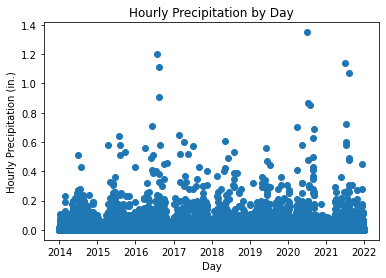

In [49]:
#get day variables
days = pd.to_datetime(data["Day"])
#look at general precipitation per day
plt.title("Hourly Precipitation by Day")
plt.xlabel("Day")
plt.ylabel("Hourly Precipitation (in.)")
plt.scatter(days, hp)
plt.show()

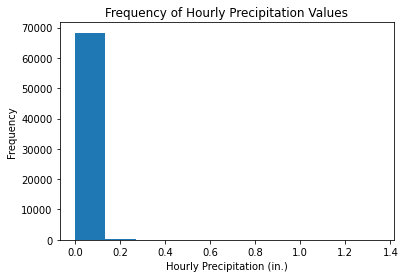

In [50]:
#look at how frequently each precipitation value appears
plt.title("Frequency of Hourly Precipitation Values")
plt.xlabel("Hourly Precipitation (in.)")
plt.ylabel("Frequency")
plt.hist(data['HourlyPrecipitation'])
plt.show()

Most hours had 0 inches of precipitation, with very sparse values otherwise.
There also seem to be outliers, with some values up to 1.35 inches appearing, as shown in the scatterplot.

In [51]:
#Loading Average Dry Bulb Temperature
adbt = data["Avg Dry Bulb Temp"]
adbt.describe()

count    69367.000000
mean        48.852083
std         20.340282
min        -26.000000
25%         33.000000
50%         49.000000
75%         66.000000
max         95.000000
Name: Avg Dry Bulb Temp, dtype: float64

The mean of the Average Dry Bulb Temperature (which will be referred to as ADBT) per day is roughly 48.85 degrees Fahrenheit in 2014-2021. The standard deviation for the ADBT is roughly 20.34, so the temperature typically deviated from the mean by roughly 20.34 degrees Fahrenheit. There is a bigger range, from a minimum of -26 degrees to a maximum of 95 degrees.

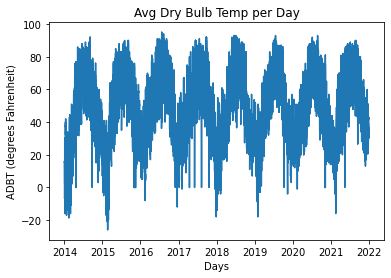

In [52]:
#plot to see distribution
plt.title("Avg Dry Bulb Temp per Day")
plt.xlabel("Days")
plt.ylabel("ADBT (degrees Fahrenheit)")
plt.plot(days, adbt)
plt.show()

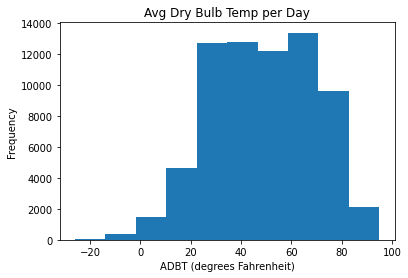

In [53]:
#plot frequencies
plt.title("Avg Dry Bulb Temp per Day")
plt.xlabel("ADBT (degrees Fahrenheit)")
plt.ylabel("Frequency")
plt.hist(adbt)
plt.show()

The ADBT histogram also shows a slightly left skewed graph, where the temperatures are centered around 50 degrees. Most temperatures are within 20 to 80 degrees.

Question 2:

In [54]:
#check the Day column to see the dates present and format
data['Day']

0        2014-01-01
1        2014-01-01
2        2014-01-01
3        2014-01-01
4        2014-01-01
            ...    
69987    2021-12-31
69988    2021-12-31
69989    2021-12-31
69990    2021-12-31
69991    2021-12-31
Name: Day, Length: 69992, dtype: object

In [55]:
#change Day column to datetime objects and get the months
data['Day'] = pd.to_datetime(data['Day'])
data['Month'] = data['Day'].dt.month
#group hp by months and get the average precipitation per month
hp_by_month = data.groupby('Month')['HourlyPrecipitation'].mean()
#show values
hp_by_month

Month
1     0.001927
2     0.002295
3     0.003196
4     0.004244
5     0.004524
6     0.003602
7     0.003813
8     0.004246
9     0.003102
10    0.003506
11    0.002532
12    0.002114
Name: HourlyPrecipitation, dtype: float64

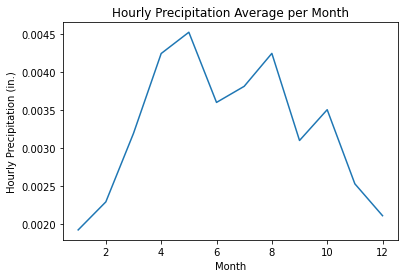

In [56]:
#show the monthly precipitation distribution in a line graph
plt.title("Hourly Precipitation Average per Month")
plt.xlabel("Month")
plt.ylabel("Hourly Precipitation (in.)")
plt.plot(hp_by_month)
plt.show()

The Hourly Precipitation seems to be the highest during the middle or summer season of the year, reaching a maximum of an average of 0.004524 inches during month 5, or May. It is much lower during the ends or winter seasons of the year, reaching a minimum of an average of 0.001927 inches during month 1, or January. There is a steep increase in precipitation between months 1 through 4, where it stays at a higher amount, then declines between months 8 through 12.

In [57]:
#group adbt by months and get the average temperature per month
adbt_by_month = data.groupby('Month')['Avg Dry Bulb Temp'].mean()
#show the distribution
adbt_by_month

Month
1     24.474006
2     24.767325
3     35.318376
4     46.718677
5     58.966430
6     68.013109
7     71.359251
8     70.158439
9     63.520193
10    51.857246
11    38.069436
12    31.537182
Name: Avg Dry Bulb Temp, dtype: float64

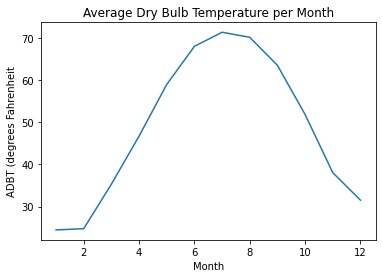

In [58]:
#graph the temperatures per month
plt.title("Average Dry Bulb Temperature per Month")
plt.xlabel("Month")
plt.ylabel("ADBT (degrees Fahrenheit")
plt.plot(adbt_by_month)
plt.show()

The Average Dry Bulb Temperature seems to also have a maximum during the summer months, reaching an average temperature of 71.359251 degrees during July. It also reaches a minimum average temperature of 24.474006 degrees during January and has much colder temperatures during the winter months. There is a steady increase in temperature from January to roughly July, then a steady decrease from July to December.

Question 3:

In [59]:
#fill NaN vals in HP with 0
data['HourlyPrecipitation'] = data['HourlyPrecipitation'].fillna(0)
#get 24 hour precipitation rolling sums
sum_day_hp = data['HourlyPrecipitation'].rolling(24).sum()
#print maximum daily hp
max_day_hp = sum_day_hp.max()
print('Most precipitation in a day:', max_day_hp, 'inches')

Most precipitation in a day: 3.3100000000000005 inches


In [60]:
#get 3 day precipitation rolling sums
three_day_hp_sum = data['HourlyPrecipitation'].rolling(168).sum()
#print max 3 day hp
three_day_hp_max = three_day_hp_sum.max()
print('Most precipitation in 3 days:', three_day_hp_max, 'inches')

Most precipitation in 3 days: 3.72 inches


Question 4:

In [61]:
#get 6 hour precipitation rolling sums 
six_hr_hp_sums = data['HourlyPrecipitation'].rolling(6).sum()
six_hr_hp_sums.fillna(0, inplace=True)
#estimate is 2.22 in
counter = 0
for s in six_hr_hp_sums:
    if s > 2.22:
        counter += 1
print('Ann Arbor has surpassed this estimate', counter, 'time(s).')

Ann Arbor has surpassed this estimate 3 time(s).
